# NON BINARY CLASSIFICATION

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('train.csv')


X = df.drop(columns=['price_range'])
y = df['price_range']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

LogisticRegression()

In [11]:
y_pred = classifier.predict(X_test_lda)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       151
           1       0.93      0.99      0.96       146
           2       0.93      0.91      0.92       148
           3       0.95      0.94      0.94       155

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [13]:
accuracy_lda = accuracy_score(y_test, y_pred)
print(f"Accuracy score after LDA: {accuracy_lda:.2f}")


Accuracy score after LDA: 0.95


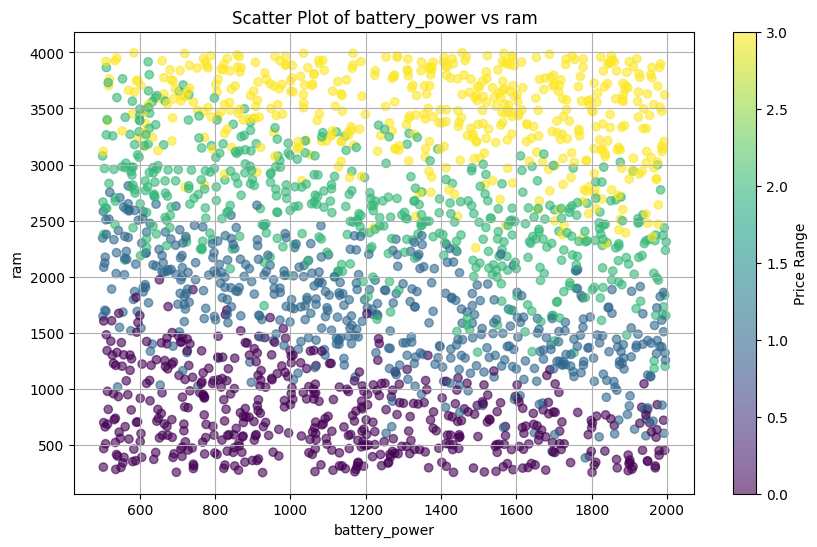

In [14]:
feature1 = 'battery_power'  
feature2 = 'ram'  
plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], c=df['price_range'], cmap='viridis', alpha=0.6)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of {} vs {}'.format(feature1, feature2))
plt.colorbar(label='Price Range')
plt.grid(True)
plt.show()

# BINARY CLASSIFICATION

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [16]:
column_names = [
    "attribute1", "attribute2", "attribute3", "attribute4", "attribute5",
    "attribute6", "attribute7", "attribute8", "attribute9", "attribute10",
    "attribute11", "attribute12", "attribute13", "attribute14", "attribute15",
    "attribute16", "attribute17", "attribute18", "attribute19", "attribute20",
    "attribute21", "attribute22", "attribute23", "attribute24", "attribute25",
    "attribute26", "attribute27", "attribute28", "attribute29", "attribute30",
    "attribute31", "attribute32", "attribute33", "attribute34", "class"
]

df = pd.read_csv('ionosphere.data', names=column_names)
 
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values


In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


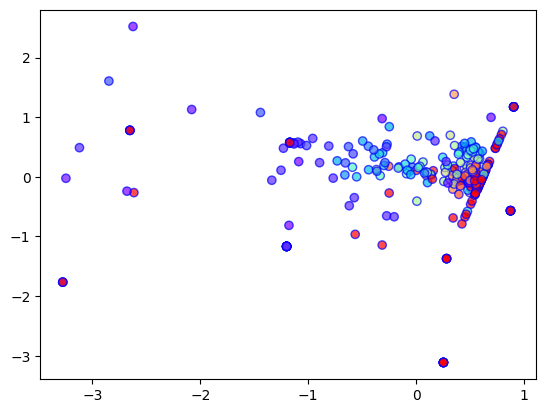

In [19]:
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b')


In [20]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)


Accuracy : 0.323943661971831
[[ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 18]]
